In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from nltk.corpus import stopwords
from wordcloud import WordCloud

from models.MeTooDataset import MeTooDataset

In [2]:
dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_testing'
)

In [3]:
stopword_list = ['answer', 'full', 'text', 'retweet', 'quote']
stopword_list.extend(stopwords.words('english'))

In [4]:
df = pd.DataFrame([dataset.X, dataset.y, dataset.id]).transpose()

In [5]:
corpora = {
    user_id: " ".join(
        df.loc[df['user_id'] == user_id]['text'].tolist()
    )
    
    for user_id in set(df['user_id'])
}

In [6]:
wordclouds = {
    user_id: WordCloud(
        stopwords=stopword_list,
        background_color='white'
    ).generate(corpora[user_id])
    
    for user_id in corpora.keys()
}

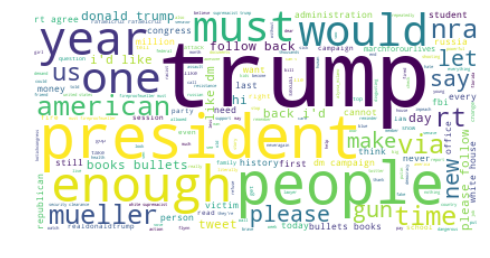

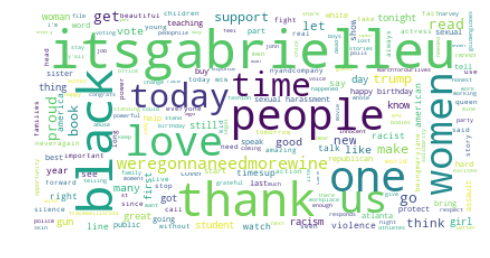

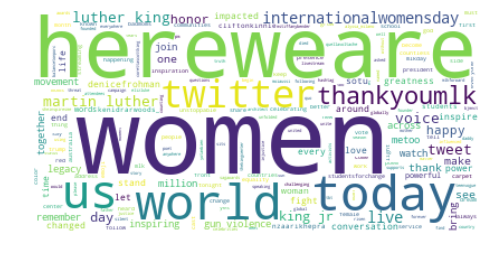

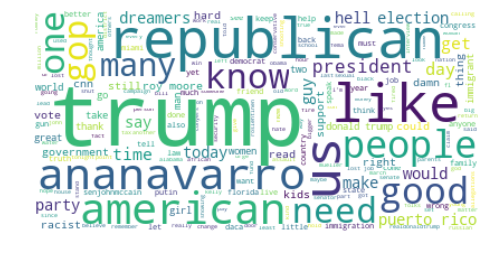

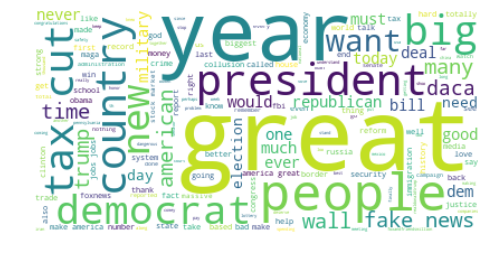

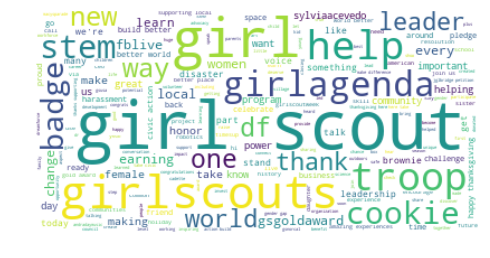

In [7]:
for user_id in wordclouds.keys():

    plt.figure(figsize=(8,8))
    plt.imshow(wordclouds[user_id], interpolation='bilinear')
    plt.axis("off")

    with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/wordcloud_{user_id}.eps', 'wb') as f:
        plt.savefig(f, format='eps')